## QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### DATA CLEANING

In [1]:
import pandas as pd
import numpy as np

In [2]:
careers=pd.read_csv('jobdata.csv')

In [3]:
careers.drop(columns='Unnamed: 0',inplace=True)

In [4]:
careers.isnull().sum()

salary             197
salarytype         197
joblist              2
commitment           2
location           403
seniority           29
company              2
requirements        81
job_description      2
dtype: int64

In [5]:
careers.dropna(inplace=True)

In [6]:
careers.head()

,salary,salarytype,joblist,commitment,location,seniority,company,requirements,job_description
1,"$14,000to$16,000",Monthly,Regional Data Director,"Permanent, Full Time",991C ALEXANDRA ROAD 119971,"Manager, Professional",TBWA SINGAPORE PTE LTD,RequirementsWhat skills does a Regional Data D...,Roles & ResponsibilitiesWhat exactly does a Re...
2,"$2,500to$3,500",Monthly,Human Resource Executive,Full Time,"JURONG FOOD HUB, 15 JALAN TEPONG 619336",Senior Executive,EBUY PTE. LTD.,Requirements ~ Analyse employee demographics a...,Roles & ResponsibilitiesThe Human Resource Exe...
3,"$3,000to$6,000",Monthly,HR Officer,"Part Time, Permanent, Full Time, Flexi work","UNITY CENTRE, 51 BUKIT BATOK CRESCENT 658077","Executive, Senior Executive",TRAQUE PTE. LTD.,Requirements Working with hiring managers to d...,Roles & ResponsibilitiesAs part of a human res...
4,"$4,500to$6,000",Monthly,Finance Manager,Permanent,"CLIFFORD CENTRE, 24 RAFFLES PLACE 048621",Manager,BURGER KING SINGAPORE PTE. LTD.,RequirementsResponsibilities Responsible for ...,Roles & ResponsibilitiesThe Finance Manager (F...
5,"$4,000to$4,500",Monthly,DotNet Developer,Contract,"INTERNATIONAL PLAZA, 10 ANSON ROAD 079903",Professional,XPLORE INFOCOMZ SOLUTION (PTE. LTD.),RequirementsQualifications & Experiences: Must...,Roles & ResponsibilitiesJob Description: We ar...


### EDA

In [7]:
import matplotlib.pyplot as plt


Text(0,0.5,'Count')

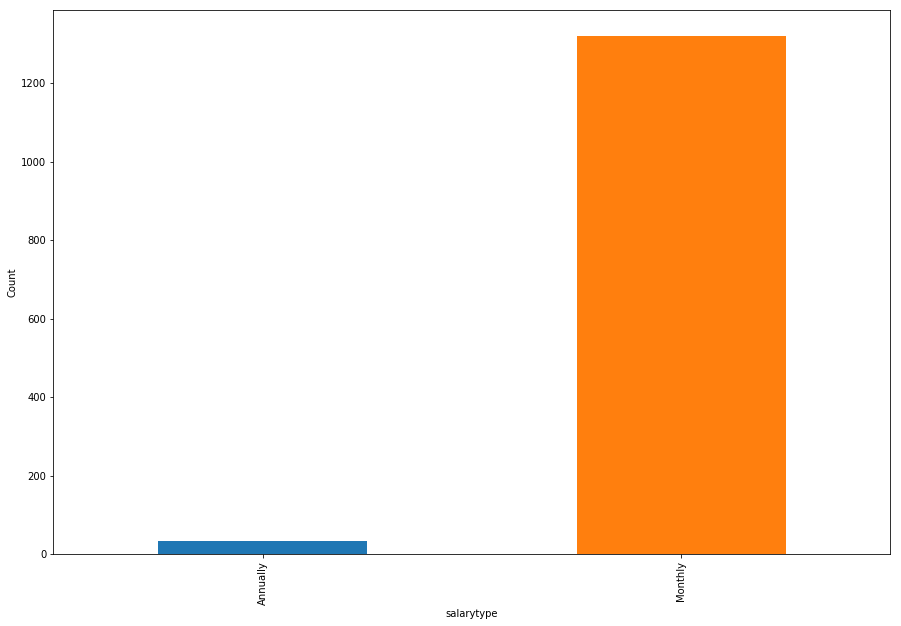

In [8]:
fig,ax=plt.subplots(figsize=(15,10))
careers.groupby(['salarytype']).count()['salary'].plot(kind='bar')
ax.set_ylabel('Count')

Text(0,0.5,'Count')

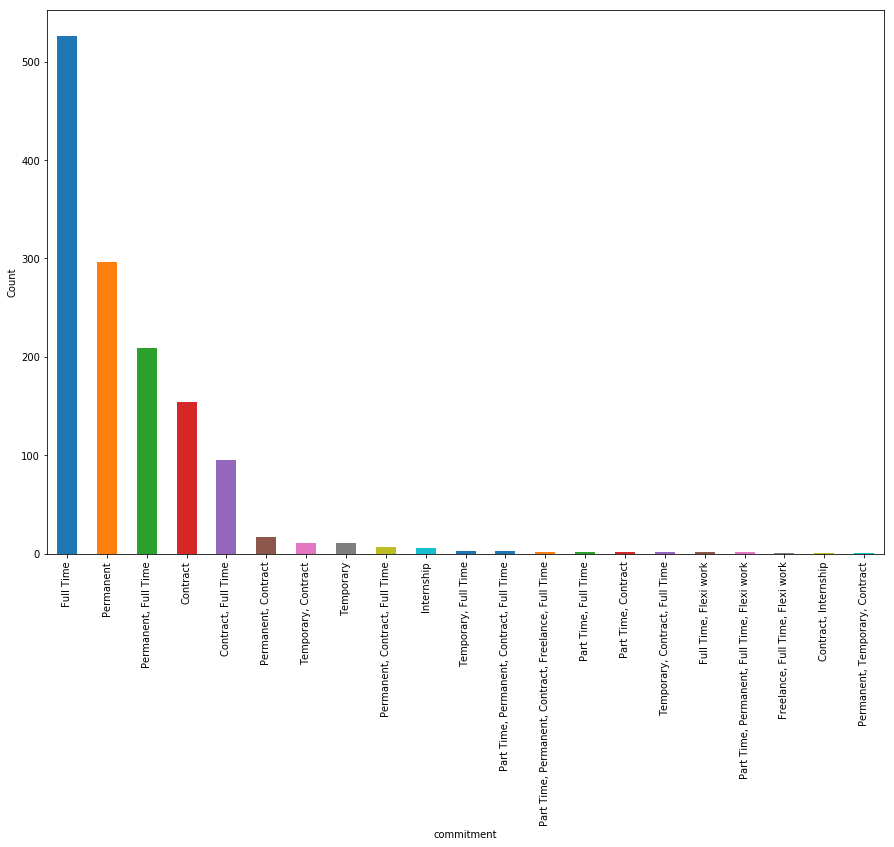

In [9]:
fig,ax=plt.subplots(figsize=(15,10))
careers.groupby(['commitment']).count()['salary'].sort_values(ascending=False).plot(kind='bar')
ax.set_ylabel('Count')

### FEATURE ENGINEERING

#### Classification Problem

#### We will frame this as a classification problem, so we will have to split it into higher vs lower salary

1) For location, we will just use postal code as all the information is already in the postal code.

2) For salary, we will split it into min salary and max salary. Followed by a division of 12 for those that have salarytype annually. After which, we will use the average of the min and max salary and split it into higher=above median, lower=below median

3) Requirements and job_description will be taken out as they do not help with the classfication problem


1)

In [10]:
careers['location']=careers['location'].str.split(' ').map(lambda x:x[-1])

2)

In [11]:
careers[['salarymin','salarymax']]=careers['salary'].str.split("to", n = 1, expand = True)

In [12]:
careers.drop(columns='salary',inplace=True)

In [13]:
careers[['salarymin','salarymax']]=careers[['salarymin','salarymax']].applymap(lambda x:x.replace('$',' ').replace(',',''))

In [14]:
careers[['salarymin','salarymax']]=careers[['salarymin','salarymax']].applymap(lambda x:int(x))

In [15]:
careers.loc[careers['salarytype']=='Annually',['salarymin','salarymax']]=careers.loc[careers['salarytype']=='Annually',['salarymin','salarymax']]/12

In [16]:
careers.drop(columns='salarytype',inplace=True)

In [17]:
careers['avgsalary']=(careers['salarymin']+careers['salarymax'])/2

In [18]:
careers['salaryhigh']=[1 if x>np.median(careers['avgsalary']) else 0 for x in careers['avgsalary']]

In [19]:
careers2=careers.drop(columns=['salarymin','salarymax','avgsalary'])

3)

In [20]:
careers2.drop(columns=['job_description','requirements'],inplace=True)

In [21]:
careers2.head()

,joblist,commitment,location,seniority,company,salaryhigh
1,Regional Data Director,"Permanent, Full Time",119971,"Manager, Professional",TBWA SINGAPORE PTE LTD,1
2,Human Resource Executive,Full Time,619336,Senior Executive,EBUY PTE. LTD.,0
3,HR Officer,"Part Time, Permanent, Full Time, Flexi work",658077,"Executive, Senior Executive",TRAQUE PTE. LTD.,0
4,Finance Manager,Permanent,048621,Manager,BURGER KING SINGAPORE PTE. LTD.,0
5,DotNet Developer,Contract,079903,Professional,XPLORE INFOCOMZ SOLUTION (PTE. LTD.),0


In [22]:
dummycareers=pd.get_dummies(careers2)

## MODELLING

### MODELS
1) Logistic regression(with best/no best)

2) KNN(with best/no best)

3) Random Forest(with best/no best)

4) DecisionTreeClassifier(with best/no best)

5) AdaBoosting/Gradient boosting ensemble(with best/no best)

6) SVM

## Logistic Regression:

In [23]:
#splitting into train-test set
y=dummycareers['salaryhigh']
X=dummycareers.iloc[:,1:]

In [24]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=42)
logis=LR.fit(X,y)

In [25]:
#Cross-val within train data
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y, scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8325512431418147
0.02587104040455497


### KNN:

In [26]:
#using all features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [27]:
#Cross-val within train data
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
KNN=knn.fit(Xs,y)
score=cross_val_score(knn, Xs,y, scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.6109811637241368
0.022703589781842552


### Random Forest:

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
rfc=RFC.fit(X,y)

/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
score=cross_val_score(RFC, X,y, scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.829559148103491
0.026008598869026255


### DecisionTree:

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtcN = DecisionTreeClassifier(max_depth=None, random_state=42)
DTCN=dtcN.fit(X,y)

In [31]:
score=cross_val_score(dtcN,X, y,scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.7410342920353982
0.007902938836257053


### Gradient Boosting:

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
XGB=GradientBoostingClassifier()
grad=XGB.fit(X,y)

In [33]:
score=cross_val_score(XGB,X,y, scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8142062946095319
0.016898476780623266


### SVM

### Linear

In [34]:
from sklearn.svm import SVC
svclass=SVC(kernel='linear')
svclass.fit(X,y)
score=cross_val_score(svclass,X, y,scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8174067593360944
0.021340105918093478


### Polynomial

In [35]:
svclass=SVC(kernel='poly')
svclass.fit(X,y)
score=cross_val_score(svclass,X, y,scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8070983544841533
0.029248025054952817


### GAUSSIAN

In [36]:
svclass=SVC(kernel='rbf')
svclass.fit(X,y)
score=cross_val_score(svclass,X, y,scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.7687007282093852
0.03595408780333809


## FEATURE SELECTION

Using the best 3 models, we will perform feature selection and choose the best features to see if they affect the score

In [37]:
# We will use the 10 best features for the models
from sklearn.feature_selection import SelectKBest, chi2, f_classif
# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# Train the selector on the data.
skb_f.fit(X, y)
skb_chi2.fit(np.abs(X), np.abs(y))

# Examine the results.
kbest = pd.DataFrame([list(X.columns), list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest.head(10)

,feature,f_classif,chi2 score
1517,seniority_Junior Executive,103.612,88.8952
1539,seniority_Senior Management,52.6746,48.6715
1531,seniority_Professional,48.2558,38.1768
1509,seniority_Fresh/entry level,44.5938,41.763
1094,location_018981,43.4466,40.6597
1529,seniority_Non-executive,41.0395,37.0584
1519,seniority_Manager,34.4024,29.9227
1273,location_188216,27.8698,26.8012
1878,company_MACHSPEED HUMAN RESOURCES PTE. LTD.,25.7264,24.8159
1524,seniority_Middle Management,24.8329,23.41


Understandable as the seniority of the positions do play a huge factor in salary logically.

In [38]:
X10=X[[x for x in kbest['feature']]]
#Let's use the best 10 features on our best 3 models

### Logistic Regression

In [39]:
score=cross_val_score(LR,X10,y, scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8325545063168841
0.025873108847731103


### Random Forest 

In [40]:
score=cross_val_score(RFC, X10,y, scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8279849284808765
0.025892432159416254


### SVM

In [41]:
svclass=SVC(kernel='linear')
score=cross_val_score(svclass,X10, y,scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8174067593360944
0.021340105918093478


Models do not have any significant change with 10 best features

## MODELLING WITH NLP

Now, we add in job descriptions and requirements and see if they have any effect on the model scores

In [95]:
nlpcareers=careers.drop(columns=['salarymin','salarymax','avgsalary'])

In [105]:
nlpcareers['requirements']=nlpcareers['requirements'].apply(lambda x:x.replace('Requirements',''))
nlpcareers['job_description']=nlpcareers['job_description'].apply(lambda x:x.replace('Roles & Responsibilities',''))

In [115]:
nlpcareers['summary']=nlpcareers['requirements']+' '+nlpcareers['job_description']

In [127]:
from nltk.tokenize import WordPunctTokenizer
import re
wpt=WordPunctTokenizer()
stop_words=[]
def normalize_document(doc):
    doc=re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc=doc.lower()
    doc=doc.strip()
    tokens=wpt.tokenize(doc)
    filtered_tokens=[token for token in tokens if token not in stop_words]
    doc=' '.join(filtered_tokens)
    return(doc)

nlpcareers['summary']=nlpcareers['summary'].apply(normalize_document)

In [132]:
x=nlpcareers['summary']
Y=nlpcareers['salaryhigh']

In [134]:
# Count vectorise the x which is job description and job requirements
cvt = CountVectorizer(ngram_range=(1,4))
tokens = pd.DataFrame(cvt.fit_transform(x).todense(), columns=cvt.get_feature_names())

### Logistic Regression(NLP)

In [135]:
LR.fit(tokens, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
score=cross_val_score(LR,tokens,y, scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8240283523013119
0.014914962027797919


### Random Forest(NLP)

In [137]:
score=cross_val_score(RFC, tokens,y, scoring='roc_auc')
print(np.mean(score))
print(np.std(score))

0.8011063536462887
0.012112486296974152


Conclusion:

The best model seems to be Logistic Regression as it is simple yet powerful.

LR score= 0.8325545063168841

LR std= 0.025873108847731103

LR NLP score= 0.8240283523013119

LR NLP std= 0.014914962027797919


Followed by Random Forest:

RF score= 0.8279849284808765

RF std= 0.025892432159416254

RF NLP score= 0.8011063536462887

RF NLP std= 0.012112486296974152

Seniority seems to be a very major deciding factor in salary, which makes sense logically as people with more experience should be paid more than entry level graduates

## QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.

The target will be finding out the features in the job title that are important for distinguishing junior vs senior positions:
    

In [45]:
careers.rename(columns={'joblist':'jobcategory'}, inplace=True)

In [53]:
careers3=careers.drop(columns=['salarymin','salarymax','salaryhigh'])

NLP

In [55]:
careers3.head()

,jobcategory,commitment,location,seniority,company,requirements,job_description,avgsalary
1,Regional Data Director,"Permanent, Full Time",119971,"Manager, Professional",TBWA SINGAPORE PTE LTD,RequirementsWhat skills does a Regional Data D...,Roles & ResponsibilitiesWhat exactly does a Re...,15000.0
2,Human Resource Executive,Full Time,619336,Senior Executive,EBUY PTE. LTD.,Requirements ~ Analyse employee demographics a...,Roles & ResponsibilitiesThe Human Resource Exe...,3000.0
3,HR Officer,"Part Time, Permanent, Full Time, Flexi work",658077,"Executive, Senior Executive",TRAQUE PTE. LTD.,Requirements Working with hiring managers to d...,Roles & ResponsibilitiesAs part of a human res...,4500.0
4,Finance Manager,Permanent,048621,Manager,BURGER KING SINGAPORE PTE. LTD.,RequirementsResponsibilities Responsible for ...,Roles & ResponsibilitiesThe Finance Manager (F...,5250.0
5,DotNet Developer,Contract,079903,Professional,XPLORE INFOCOMZ SOLUTION (PTE. LTD.),RequirementsQualifications & Experiences: Must...,Roles & ResponsibilitiesJob Description: We ar...,4250.0


In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import Pipeline
# cvt      =  CountVectorizer(strip_accents='unicode',min_df=51)
# X_all    =  cvt.fit_transform(careers3['requirements'])
# columns  =  np.array(cvt.get_feature_names())          # ndarray (for indexing below)

# # note this is a large sparse matrix. 
# #    - rows are tweets, columns are words 
# X_all
cv = CountVectorizer(ngram_range=(1,2), max_features=2500, binary=True, stop_words='english')
words = cv.fit_transform(careers3.job_description)
words.shape

(1353, 2500)

In [83]:
words = pd.DataFrame(words.todense(), columns=cv.get_feature_names())

In [84]:
words.head()

,000,10,12,1800,1800 2000,20,2000,2016,24,30,...,www,www google,year,yearly,yearly finalisation,years,years experience,yes,yes read,yield
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(words.values, careers3.seniority.values, test_size=0.25)

In [86]:
nb = BernoulliNB()

In [87]:
nb.fit(Xtrain, ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [81]:
nb_scores = cross_val_score(BernoulliNB(), Xtrain, ytrain, cv=5)
print(nb_scores)
print(np.mean(nb_scores))

[0.31531532 0.33971292 0.31155779 0.29896907 0.29473684]
0.31205838743810754


/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


All in all, the model is very bad in predicting job titles, this could be due to the fact that there are too many job titles. A suggestion for improvement would be too limit the number of categories of job titles. Maybe substituting words with the possible same meanings

### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.